In [88]:
from questaal_reader import *
import matplotlib.pyplot as plt
plt.style.use("dark_background")

plt.rcParams.update({'font.size': 15})

In [89]:
output=reader("out")

### get the structure

In [79]:
print(output.structure)

Full Formula (Na1 Co1 O2)
Reduced Formula: NaCoO2
abc   :   2.919871   2.919870   5.800222
angles:  75.421668  75.421666  59.999988
Overall Charge: +14.834497
Sites (4)
  #  SP           a         b         c     charge
---  ----  --------  --------  --------  ---------
  0  Co    0.50901   0.50901   0.47297    4.71774
  1  Na    0.00901   0.00901   0.97297   -0.005329
  2  O     0.782508  0.782508  0.652475   1.22654
  3  O     0.235512  0.235512  0.293465   1.22654


Muffin Tin charges of the structure final electron de1nsity is as simple as 

In [80]:
print("smooth charge",":",output.structure.charge)
for i in output.structure:
    print(i.species,":",i.charge)


smooth charge : 14.834497
Co1 : 4.717744
Na1 : -0.005329
O1 : 1.226544
O1 : 1.226544


### list available simple variables

In [81]:
output.get_variables()

data - raw data string
Iterations - Iteration object, further contains other data about iterations
structure - calculations structure (returns in pymatgen format
energy - total energy in (ev) of the final iteration (ehf)
ehf - final energy ehf
ehk - final energy ehk
atoms - species name in lmf codes
gap - final band gap from given k mesh (eV)
valance_band_max - valance band max energy in code(eV)
conduction_band_min - conduction band min in code (eV)


### get energy

In [82]:
output.energy

-46326.67400033821

### Iteration object
#### there are couple of "deep" classes inside iteration ex-

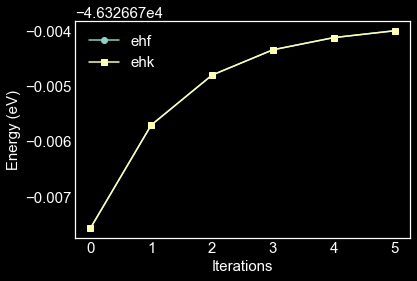

In [87]:

ehf=[i.ehf for i in output.iterations]
ehk=[i.ehk for i in output.iterations]
plt.plot(ehf,marker="o",label="ehf")
plt.plot(ehk,marker="s",label="ehk")
plt.ylabel("Energy (eV)")
plt.xlabel("Iterations")
plt.legend()
plt.savefig("ehf-ehk.png",dpi=500)
plt.show()

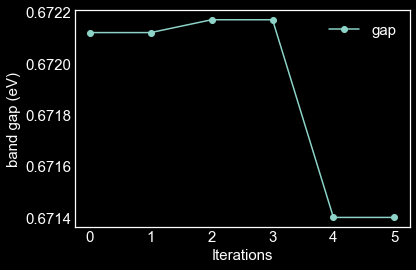

In [84]:
import matplotlib.pyplot as plt
gap=[i.gap for i in output.iterations]
plt.plot(gap,marker="o",label="gap")
plt.ylabel("band gap (eV)")
plt.xlabel("Iterations")
plt.legend()
plt.show()

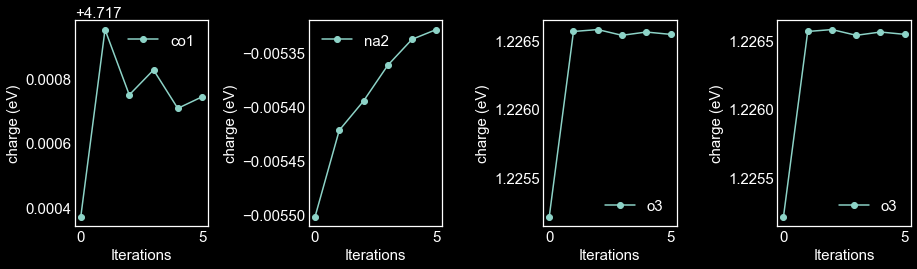

In [86]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,len(output.structure),figsize=(13,4))
for j,species in enumerate(output.species):
    charge=[i.charge[species].charge for i in output.iterations]
    ax[j].plot(charge,marker="o",label=species)
    ax[j].set_ylabel("charge (eV)")
    ax[j].legend()
    ax[j].set_xlabel("Iterations")
plt.tight_layout()
plt.show()

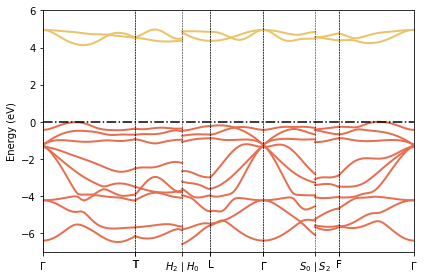

In [7]:
from questaal_reader import get_bands
import matplotlib.pyplot as plt
from pymatgen.electronic_structure.plotter import BSPlotter as bp

# returns a pymatgen BandStructureSymmLine object for easy plotting 
# make sure site file, bnds and syml file are present in the same directory
p=get_bands("./band-data/bnds.temp")

#Now it can be plotted with pymatgen as bp(p).get_plot() or
# to illustrate a more aesthetic plotting,


fig,ax=plt.subplots()
for i in range(len(bp(p).bs_plot_data()['distances'])):
    d=bp(p).bs_plot_data()['distances'][i]
    e=bp(p).bs_plot_data()['energy'][i]['1']
    for k in e:
        if k[0]>0:c="#e9c46a"
        else:c="#e76f51"
        plt.plot(d,k,c=c,lw=2)

for j,i in enumerate(bp(p).bs_plot_data()['ticks']["distance"]):
    plt.axvline(i,c="k",ls="--",lw=.5)
ax.set_xticks(bp(p).bs_plot_data()['ticks']["distance"])
ax.set_xticklabels(bp(p).bs_plot_data()['ticks']["label"])
ax.axhline(0,ls="-.",c="k")
plt.ylim(-7,6)
ax.autoscale(enable=True, axis='x', tight=True)
ax.set_ylabel("Energy (eV)")
plt.tight_layout()
plt.savefig("bands.png",dpi=400)
plt.show()